# Metodo local

In [1]:
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['dnrpa-robos-recuperos-autos-202201.csv']),sep=",")
df2.head(10)

NameError: ignored

# Metodo drive

In [2]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'
df2 = pd.read_csv('dnrpa-robos-recuperos-autos-202201.csv',sep=",")
df2.head(10)

Mounted at /content/gdrive
/content/gdrive/MyDrive


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1994-06-03,1173,BERAZATEGUI Nº 2,Buenos Aires,Nacional,1994.0,NaN,FURGON VIDRID.C/ASIE,...,Privado,Física,BERAZATEGUI,BUENOS AIRES,Masculino,1972,ARGENTINA,100,6,ARG
1,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-31,2000-10-27,1120,LA MATANZA Nº 03,Buenos Aires,Nacional,2000.0,NaN,SEDAN,...,Privado,Física,LOMAS DEL MIRADOR,BUENOS AIRES,Femenino,1991,ARGENTINA,100,6,ARG
2,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-11,1994-04-28,2086,CAPITAL FEDERAL Nº 086,Ciudad Autónoma de Bs.As.,Nacional,1994.0,NaN,FUR.VIDRIADO C/ASIEN,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,Masculino,1971,PERU,100,2,NaN
3,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-10,1992-03-27,1119,MORON Nº 03,Buenos Aires,Importado,1991.0,NaN,RURAL 4 PTAS.,...,Privado,Física,HAEDO,BUENOS AIRES,No identificado,1982,ARGENTINA,50,6,ARG
4,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-24,2000-11-01,1118,QUILMES Nº 2,Buenos Aires,Nacional,2000.0,NaN,SEDAN 4 PUERTAS,...,Privado,Física,QUILMES OESTE,BUENOS AIRES,Masculino,1947,ARGENTINA,100,6,ARG
5,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-03,1995-11-10,4058,EMBALSE,Córdoba,Nacional,1995.0,NaN,CHASIS C/CABINA P/CA,...,Privado,Física,VILLA RUMIPAL,CORDOBA,Masculino,1980,ARGENTINA,100,14,ARG
6,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-12,2000-04-05,1113,SAN VICENTE,Buenos Aires,Nacional,2000.0,NaN,3 PTAS,...,Privado,Física,GUERNICA,BUENOS AIRES,Femenino,1978,PARAGUAY,100,6,PRY
7,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-18,1997-11-18,6004,MACHAGAI,Chaco,Protocolo 21,1997.0,NaN,FURGON VIDRIADO C/ ASIENTOS,...,Privado,Física,COLONIAS UNIDAS,CHACO,Masculino,1976,ARGENTINA,100,22,ARG
8,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-06,2014-06-09,2045,CAPITAL FEDERAL Nº 045,Ciudad Autónoma de Bs.As.,Protocolo 21,2014.0,NaN,TRANSPORTE DE CARGA,...,Privado,Jurídica,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No aplica,1994,No aplica,100,2,NaN
9,DENUNCIA DE ROBO O HURTO / RETENCION INDEBIDA,2022-01-28,1998-06-12,2078,CAPITAL FEDERAL Nº 078,Ciudad Autónoma de Bs.As.,Nacional,1998.0,NaN,BERLINA 5 PTAS.,...,Privado,Física,C.AUTONOMA DE BS.AS,C.AUTONOMA DE BS.AS,No identificado,1978,ARGENTINA,100,2,ARG


In [3]:
df2.shape

(2676, 25)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tramite_tipo                    2676 non-null   object 
 1   tramite_fecha                   2676 non-null   object 
 2   fecha_inscripcion_inicial       2676 non-null   object 
 3   registro_seccional_codigo       2676 non-null   int64  
 4   registro_seccional_descripcion  2676 non-null   object 
 5   registro_seccional_provincia    2676 non-null   object 
 6   automotor_origen                2676 non-null   object 
 7   automotor_anio_modelo           2671 non-null   float64
 8   automotor_tipo_codigo           2601 non-null   object 
 9   automotor_tipo_descripcion      2676 non-null   object 
 10  automotor_marca_codigo          2644 non-null   object 
 11  automotor_marca_descripcion     2676 non-null   object 
 12  automotor_modelo_codigo         26

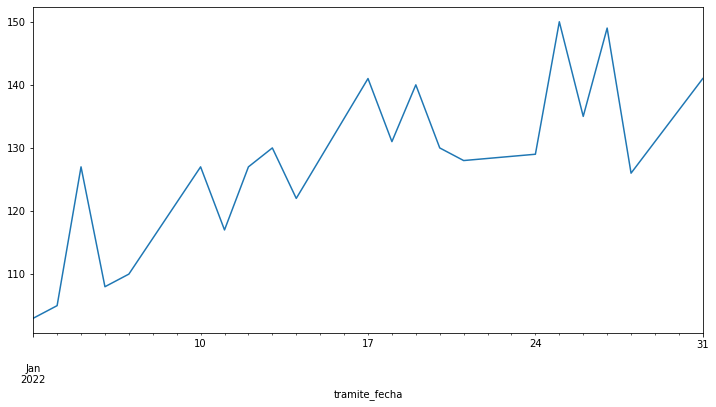

In [5]:
df2['tramite_fecha']=pd.to_datetime(df2['tramite_fecha']) # Formato datetime python 
monthly_accidents =df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()
monthly_accidents.plot.line(figsize=(12,6))

# Marca mas robada

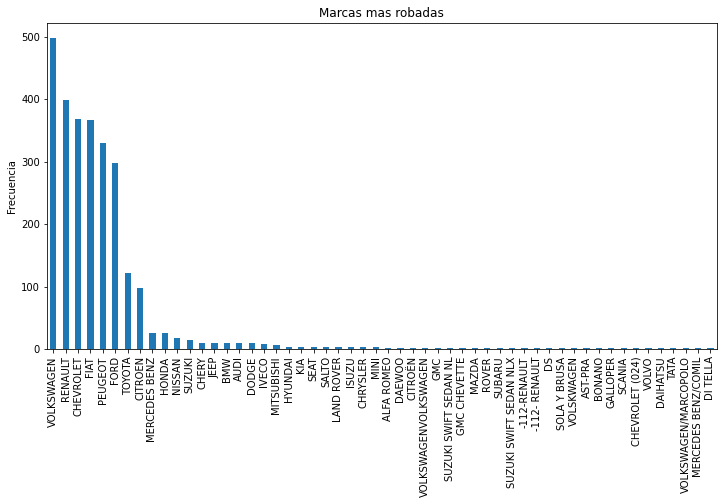

In [6]:
df2['automotor_marca_descripcion'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas mas robadas')

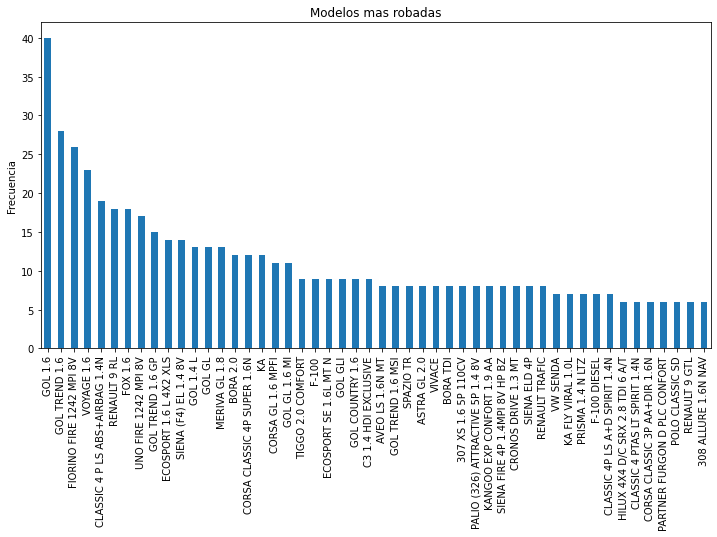

In [7]:
df2['automotor_modelo_descripcion'].value_counts().iloc[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos mas robadas')

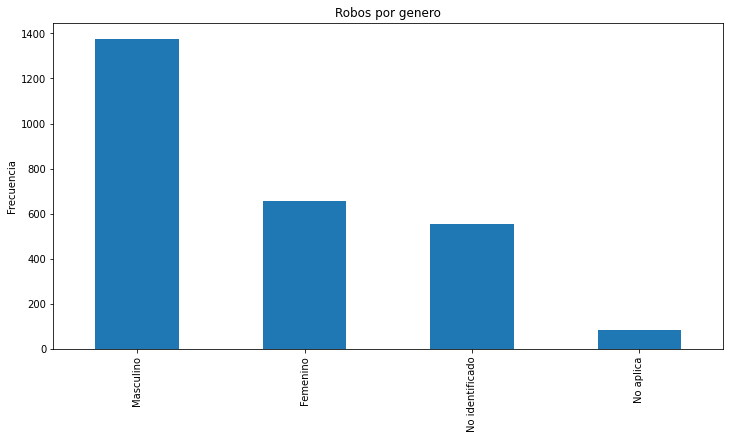

In [8]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por genero')

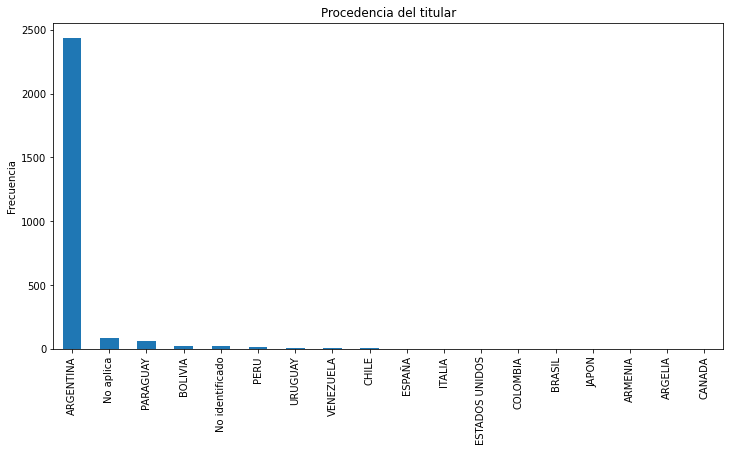

In [9]:
df2['titular_pais_nacimiento'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

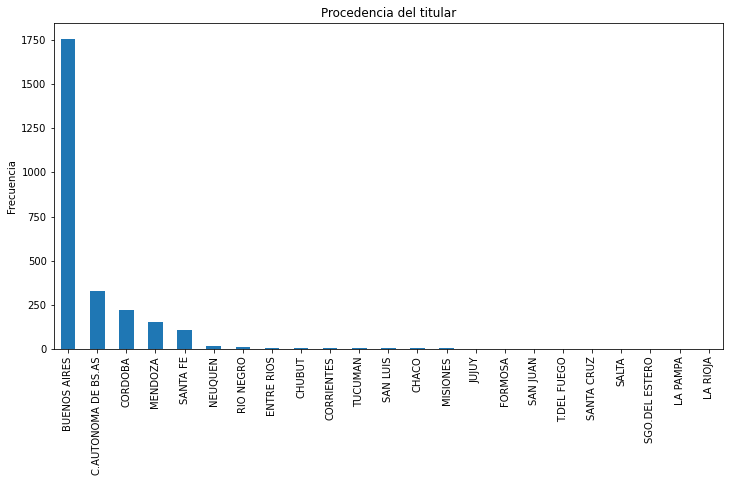

In [10]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

# Actividad colaborativa

## SQL

In [11]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
conn= sql.connect('nba_salary.sqlite')
conn

In [12]:
# Visualizar las tablas
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor. fetchall())

[('NBA_season1718_salary',), ('Seasons_Stats',)]


In [13]:
df_salary = pd.read_sql_query("SELECT * from NBA_season1718_salary", conn)
df_salary.head()

,X1,Player,Tm,season17_18
0,1.0,Stephen Curry,GSW,34682550.0
1,2.0,LeBron James,CLE,33285709.0
2,3.0,Paul Millsap,DEN,31269231.0
3,4.0,Gordon Hayward,BOS,29727900.0
4,5.0,Blake Griffin,DET,29512900.0


In [14]:
df_stats = pd.read_sql_query("SELECT * from Seasons_Stats", conn)
df_stats.head()

,X1,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1.0,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2.0,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3.0,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4.0,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


# JSON

In [15]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [16]:
# Miremos este caso especial
df = pd.read_json('nested_json.json')
df # tenemos un JSON nested

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [17]:
import json
# Normalizar los datos
with open('nested_json.json','r') as f:
    data = json.loads(f.read())# Flatten data
df_nested_list = pd.json_normalize(data, record_path =['students'])
df_nested_list

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [18]:
# Combinando
df_nested_list = pd.json_normalize(
    data, 
    record_path =['students'], 
    meta=['school_name', 'class']
)
df_nested_list

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


# APIs

In [19]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=8174667e459a410073e5000d4128c209916b9827af8543aef331dd84ecd158ea
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends


In [20]:
import pandas as pd
from pytrends.request import TrendReq
pytrends = TrendReq()
keywords = ["barcelona", "Copperfield", "Madrid"]
pytrends.build_payload(keywords, cat=0, geo='', gprop='') # Datos de los ultimos 5 años
stop_queries = pytrends.interest_over_time()[keywords]
stop_queries.head()

,barcelona,Copperfield,Madrid
date,,,
2018-01-07,24,0,33
2018-01-14,22,0,28
2018-01-21,26,0,35
2018-01-28,25,0,26
2018-02-04,24,0,28


In [21]:
stop_queries.shape

(260, 3)

In [22]:
pytrends.build_payload?

# yfinance

In [23]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 14.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [24]:
import yfinance as yf
pfe = yf.Ticker('PFE')
pfe.info

{'zip': '10017',
 'sector': 'Healthcare',
 'fullTimeEmployees': 79000,
 'longBusinessSummary': "Pfizer Inc. discovers, develops, manufactures, markets, distributes, and sells biopharmaceutical products worldwide. It offers medicines and vaccines in various therapeutic areas, including cardiovascular metabolic and women's health under the Premarin family and Eliquis brands; biologics, small molecules, immunotherapies, and biosimilars under the Ibrance, Xtandi, Sutent, Inlyta, Retacrit, Lorbrena, and Braftovi brands; and sterile injectable and anti-infective medicines, and oral COVID-19 treatment under the Sulperazon, Medrol, Zavicefta, Zithromax, Vfend, Panzyga, and Paxlovid brands. The company also provides medicines and vaccines in various therapeutic areas, such as pneumococcal disease, meningococcal disease, tick-borne encephalitis, and COVID-19 under the Comirnaty/BNT162b2, Nimenrix, FSME/IMMUN-TicoVac, Trumenba, and the Prevnar family brands; biosimilars for chronic immune and inf

In [25]:
# Scar los dividendos
pfe.actions

,Dividends,Stock Splits
Date,,
1972-08-29 00:00:00-04:00,0.003163,0.0
1972-11-28 00:00:00-05:00,0.004151,0.0
1973-02-28 00:00:00-05:00,0.003163,0.0
1973-05-30 00:00:00-04:00,0.003163,0.0
1973-08-28 00:00:00-04:00,0.003163,0.0
...,...,...
2021-11-04 00:00:00-04:00,0.390000,0.0
2022-01-27 00:00:00-05:00,0.400000,0.0
2022-05-12 00:00:00-04:00,0.400000,0.0


In [26]:
pfe.history?

In [27]:
# period: Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# Tambien se puede colocar start, end 
hist = pfe.history(period="6mo")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-05 00:00:00-04:00,50.915157,51.052897,49.586937,50.806931,18406800,0.0,0.0
2022-07-06 00:00:00-04:00,50.806927,52.105632,50.747898,51.899021,21305500,0.0,0.0
2022-07-07 00:00:00-04:00,52.095797,52.676279,51.938378,52.558212,17847600,0.0,0.0
2022-07-08 00:00:00-04:00,52.194185,53.050149,51.908863,52.312248,11322700,0.0,0.0
2022-07-11 00:00:00-04:00,52.144992,52.873056,51.899025,52.036766,12921400,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,51.860001,51.930000,51.049999,51.130001,12033800,0.0,0.0
2022-12-28 00:00:00-05:00,51.049999,51.389999,50.750000,50.799999,10053900,0.0,0.0
2022-12-29 00:00:00-05:00,51.020000,51.669998,50.990002,51.330002,8971300,0.0,0.0


# Lectura en serie de datos

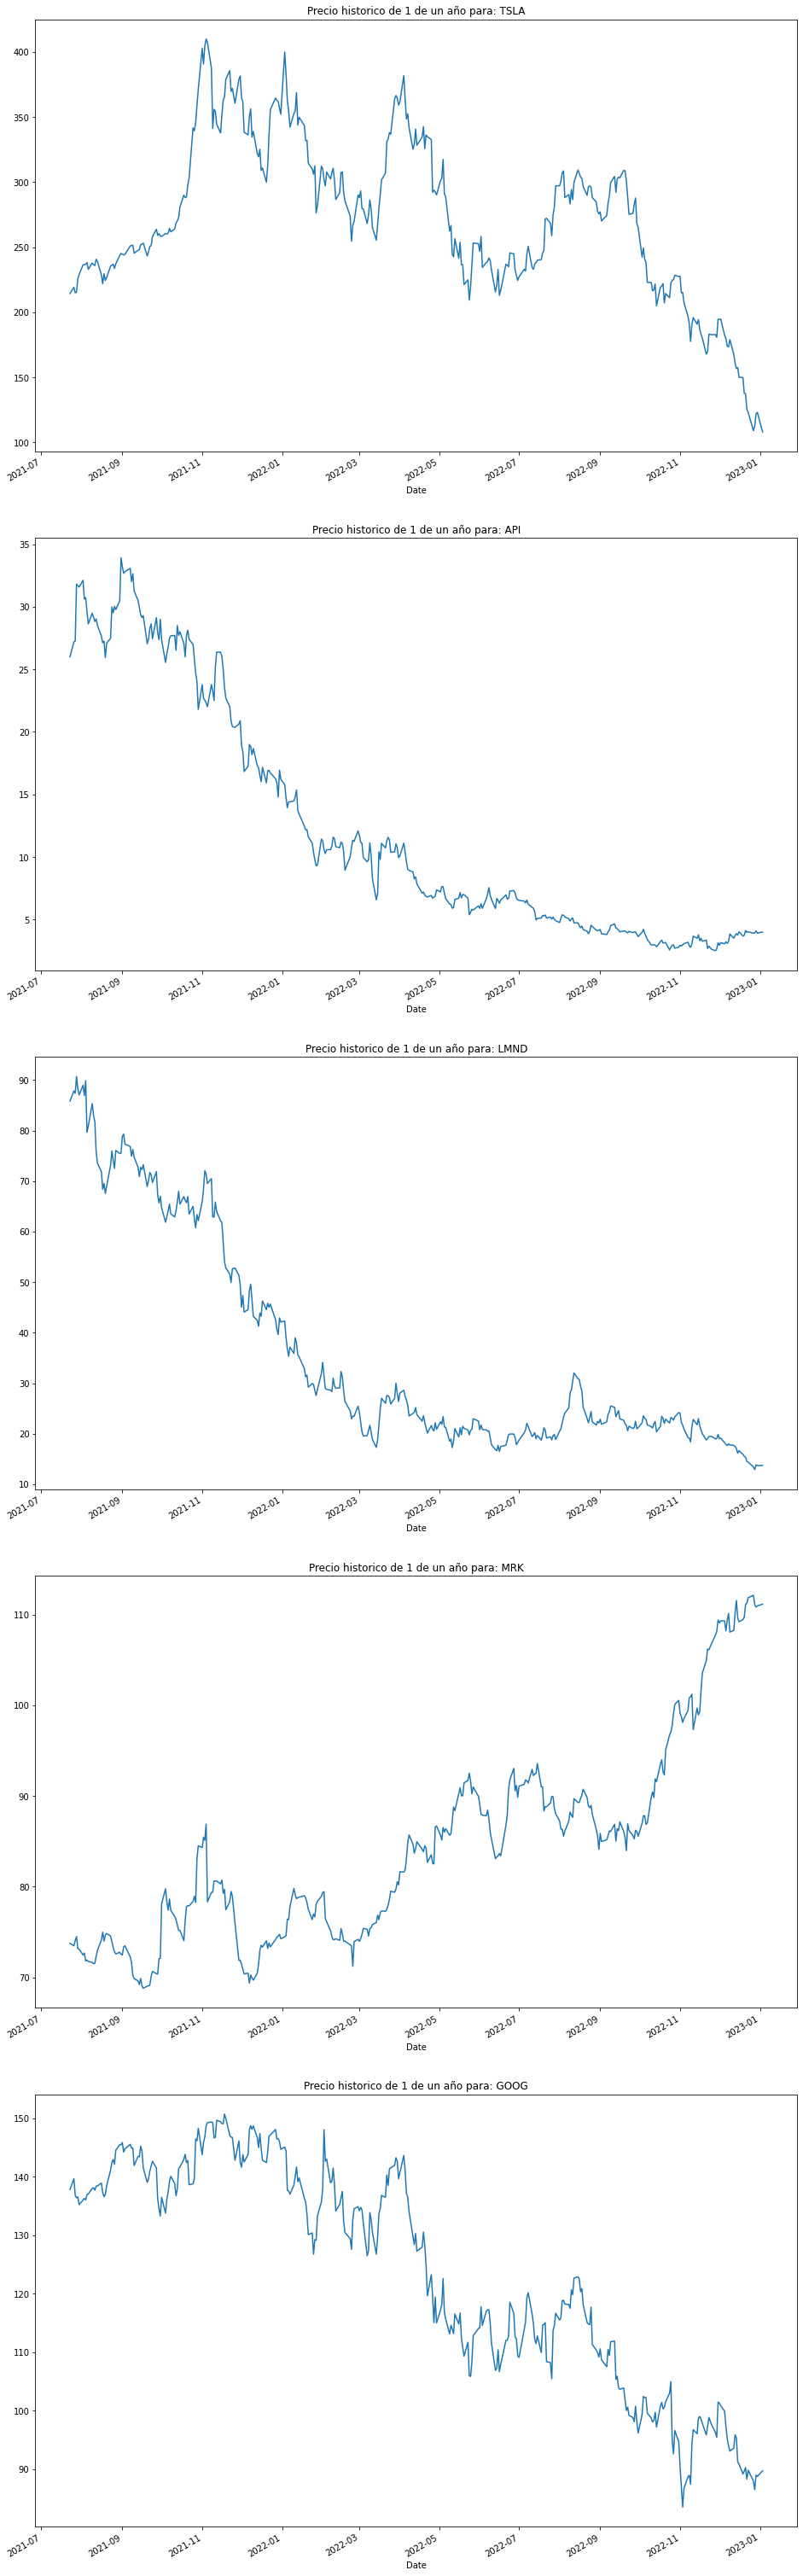

In [28]:
tickers = ['TSLA', 'API', 'LMND','MRK','GOOG']
import matplotlib.pyplot as plt
for i,ticker in enumerate(tickers):
  current_ticker = yf.Ticker(ticker)
  plt.subplot(len(tickers),1,i+1)
  current_ticker.history(period='365d')['Close'].plot(figsize=   (16,60), title='Precio historico de 1 de un año para: '+ticker)

In [29]:
# Informacion del primero
ticker = tickers[0]
yf_info = yf.Ticker(ticker).info
print(ticker)

TSLA


In [30]:
# Creciemito de 52 semanas
yf_info['52WeekChange']

-0.67854625

In [31]:
# Sacando algunas estadisticas de interes
stock_52w_change = []
profitsMargins = []
tickers = ['NVS','JNJ','ABBV','AMGN']
for ticker in tickers:
  print(ticker)
  current_ticker = yf.Ticker(ticker)
  current_ticker_info = current_ticker.info
  stock_52w_change.append(current_ticker_info['52WeekChange'])
  profitsMargins.append(current_ticker_info['profitMargins'])

NVS
JNJ
ABBV
AMGN


In [32]:
stock_52w_change

[0.03715563, 0.032557845, 0.19569397, 0.15273881]

In [33]:
profitsMargins

[0.41706002, 0.19947, 0.23188, 0.25959]

In [34]:
import pandas as pd
df = pd.DataFrame([stock_52w_change, profitsMargins], columns=tickers, index={'52w change', 'profitMargins'})
print(df)

                    NVS       JNJ      ABBV      AMGN
profitMargins  0.037156  0.032558  0.195694  0.152739
52w change     0.417060  0.199470  0.231880  0.259590


Text(0.5, 1.0, 'Comparando margenes de profit y tasas de crecimiento en 52 semanas para stocks farmacias')

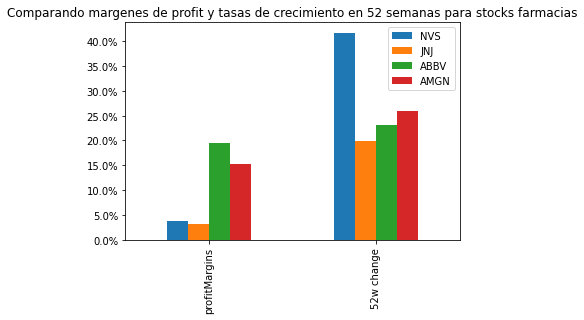

In [35]:
import matplotlib.ticker as mtick
ax = df.plot.bar()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title('Comparando margenes de profit y tasas de crecimiento en 52 semanas para stocks farmacias')